In [28]:
# Q: Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [29]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#import dataset
Crime = pd.read_csv('D:/DATA SCIENCE/1. Data Scientist/Assignment/18.6.1 clustering/crime_data.csv')

In [31]:
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
Crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


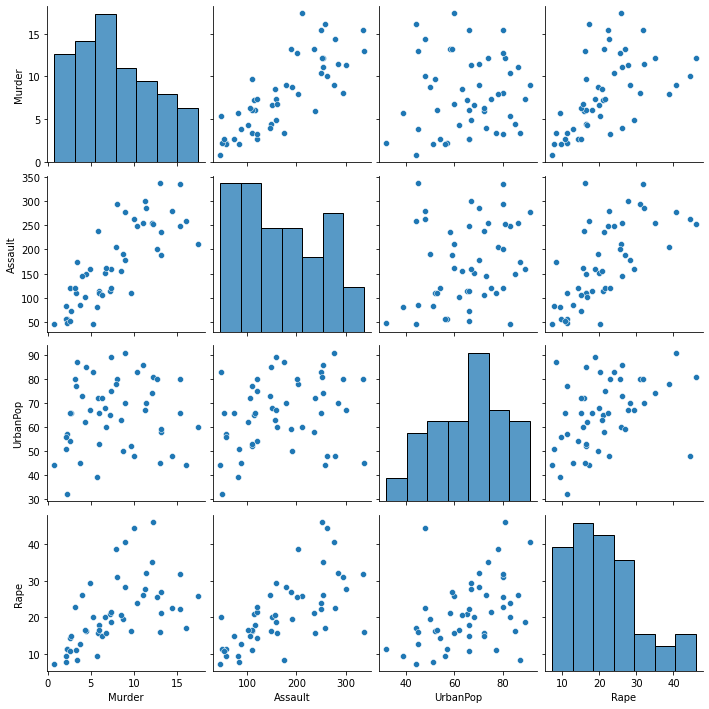

In [33]:
sns.pairplot(Crime.iloc[:,0:5])

In [34]:
# 1. Hirarchial Clustering

In [35]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [36]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(Crime.iloc[:,1:])

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

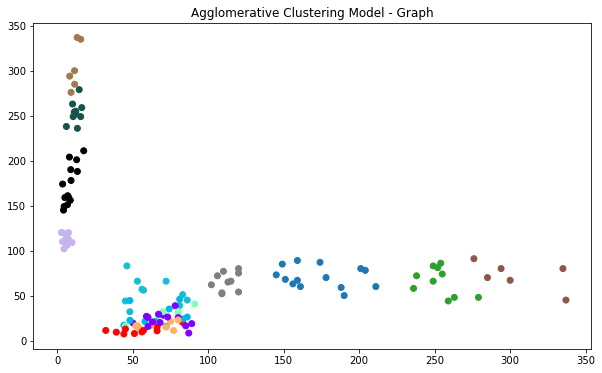

In [37]:
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model2.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model2.labels_, cmap='cubehelix')
plt.show()

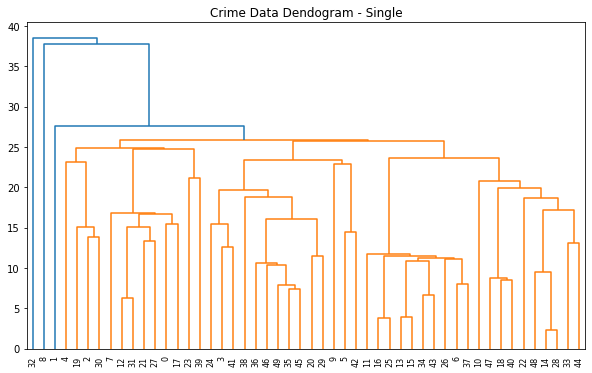

In [38]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='single'))

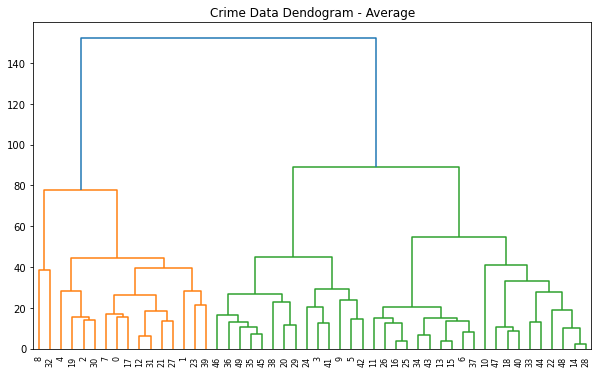

In [39]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Average")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='average'))

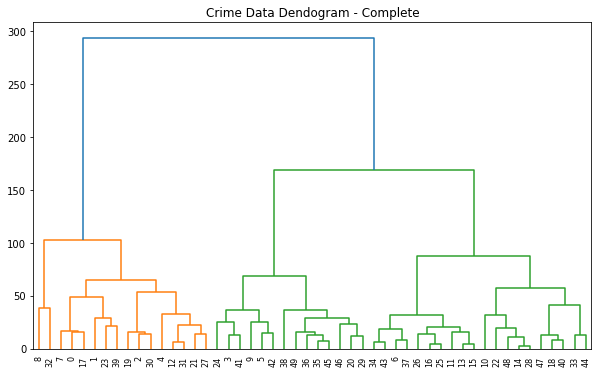

In [40]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='complete'))

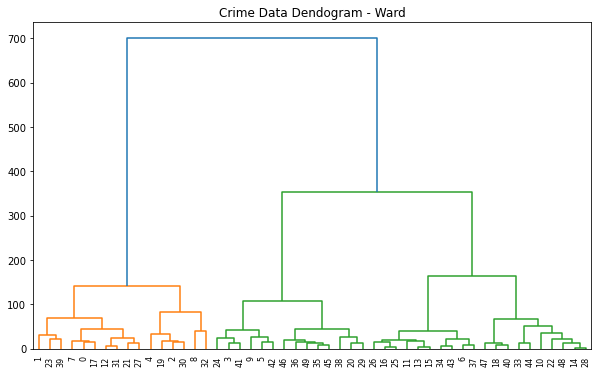

In [41]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(Crime.iloc[:,1:], method='ward'))

In [42]:
# 2. KMEANS clustering

In [43]:
# import kmeans clustering libraries
from sklearn.cluster import KMeans

In [44]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [45]:
df_norm = norm_func(Crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [46]:
from scipy.spatial.distance import cdist 
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)

Inertia :  1.3302633092724905
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0x1c879ea24c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

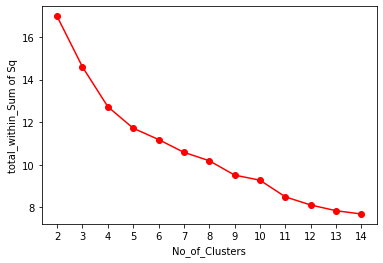

In [47]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [48]:
#  from the above scree plot Selecting 5 clusters which is the optimum number of clusters 
model1=KMeans(n_clusters=5) 
model1.fit(df_norm)

KMeans(n_clusters=5)

In [49]:
model1.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model1.labels_)  # converting numpy array into pandas series object 
Crime['clust']=md

In [50]:
# creating a  new column and assigning it to new column 
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


## KMeans Clustering Model - Graph


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


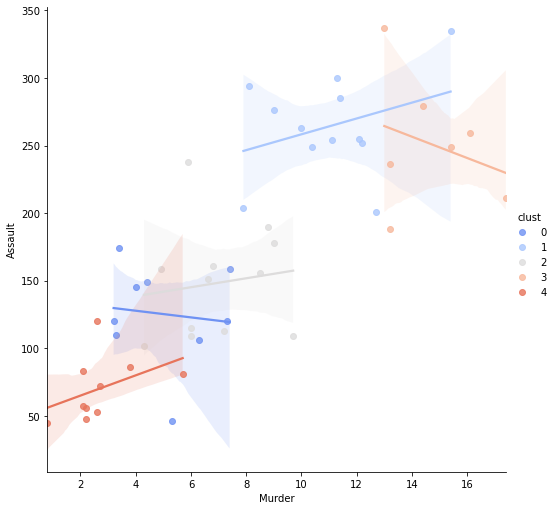

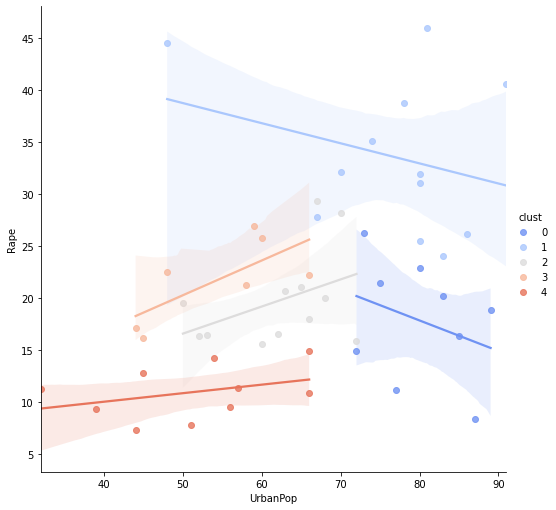

In [51]:
print("## KMeans Clustering Model - Graph")
sns.lmplot('Murder', 'Assault', data=Crime, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
sns.lmplot('UrbanPop', 'Rape', data=Crime, hue='clust', palette='coolwarm', height=7, aspect=1, fit_reg=True)
plt.show()

In [52]:
# 3.DBSCAN clustering

In [53]:
#Import the DBSCAN libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [54]:
model4 = DBSCAN(eps=0.30, min_samples=9)
model4.fit_predict(Crime.iloc[:,1:4])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

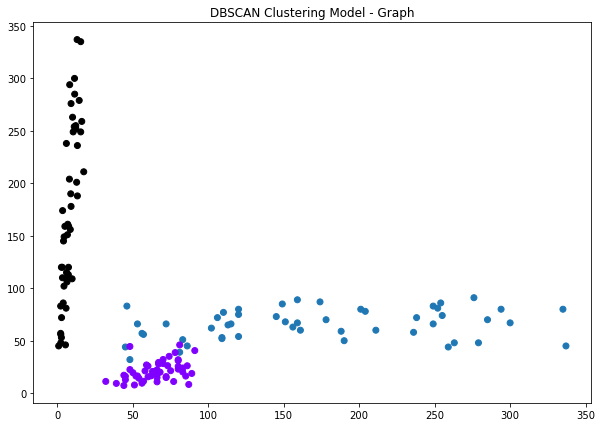

In [55]:
plt.figure(figsize=(10, 7))
plt.title("DBSCAN Clustering Model - Graph")
plt.scatter(Crime.iloc[:,2], Crime.iloc[:,3], c=model4.labels_, cmap='tab10')
plt.scatter(Crime.iloc[:,3], Crime.iloc[:,4], c=model4.labels_, cmap='rainbow')
plt.scatter(Crime.iloc[:,1], Crime.iloc[:,2], c=model4.labels_, cmap='cubehelix')
plt.show()